# **Задание 1**

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

In [4]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [13]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

train_counts = {}
validation_counts = {}
test_counts = {}

def count_labels(dataset_split, counts_dict):
  """
  Функция перебирает выборки и считает метки в каждой из них
  """
  for i in dataset_split:
      label = i['sentiment']
      if label in counts_dict:
          counts_dict[label] += 1
      else:
          counts_dict[label] = 1

count_labels(dataset['train'], train_counts)
count_labels(dataset['validation'], validation_counts)
count_labels(dataset['test'], test_counts)

print("Train counts:", train_counts)
print("Validation counts:", validation_counts)
print("Test counts:", test_counts)

Train counts: {'positive': 10478, 'neutral': 11649, 'negative': 9105}
Validation counts: {'negative': 1517, 'positive': 1760, 'neutral': 1928}
Test counts: {'neutral': 1930, 'positive': 1730, 'negative': 1546}


In [16]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке

def calculate_percentage(counts_dict, total_count):
  percentages = {}
  for label, count in counts_dict.items():
    percentages[label] = round((count / total_count) * 100, 2)
  return percentages

train_percentages = calculate_percentage(train_counts, sum(train_counts.values()))
validation_percentages = calculate_percentage(validation_counts, sum(validation_counts.values()))
test_percentages = calculate_percentage(test_counts, sum(test_counts.values()))

# Форматирование вывода
def print_percentage_counts(title, percentages_dict):
    print(f"{title} percentages:")
    for label, percentage in percentages_dict.items():
        print(f"- {label}: {percentage} %")
    print()

print_percentage_counts("Train", train_percentages)
print_percentage_counts("Validation", validation_percentages)
print_percentage_counts("Test", test_percentages)

Train percentages:
- positive: 33.55 %
- neutral: 37.3 %
- negative: 29.15 %

Validation percentages:
- negative: 29.15 %
- positive: 33.81 %
- neutral: 37.04 %

Test percentages:
- neutral: 37.07 %
- positive: 33.23 %
- negative: 29.7 %



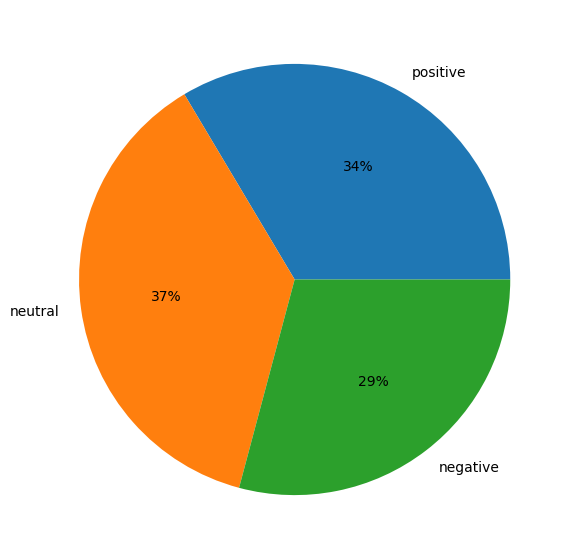

In [18]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = list(validation_percentages.keys())
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = list(validation_percentages.values())

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

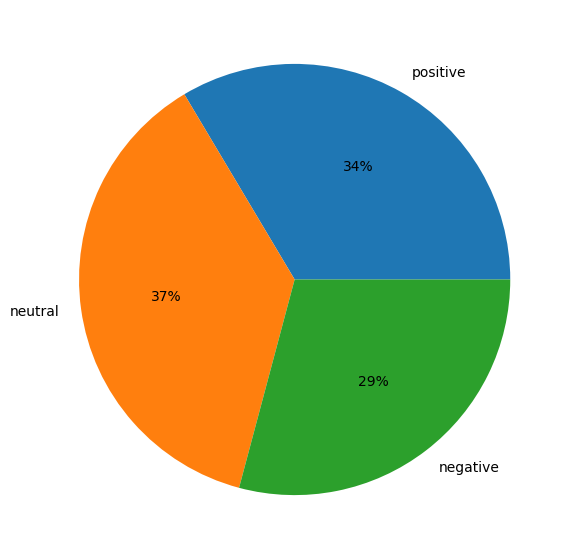

In [22]:
# Сделаем то же самое для проверочной выборки
labels = list(train_percentages.keys())

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')

plt.show()

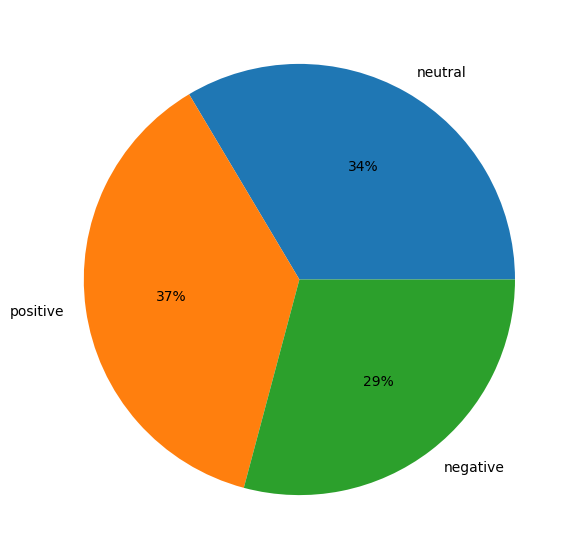

In [20]:
# Сделаем то же самое для тестовой выборки
labels = list(test_percentages.keys())

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')

plt.show()

# **Задание 2**

In [23]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [24]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [25]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [26]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [27]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [28]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [29]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [30]:
# Синтаксическая роль (зависимости)
for token in doc:
    print(token.dep_)

compound
compound
ROOT
punct
amod


In [31]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [41]:
# Выведите первые 5 текстов
test_texts = [text['text'] for text in dataset['test']]

test_texts[:5]

['getting cds ready for tour',
 ' MC, happy mother`s day to your mom ;).. love yah',
 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?',
 ' because you had chips and sale w/o me',
 'Great for organising my work life balance']

2. Создадим список токенов для каждого текста с помощью SpaCy

In [45]:
tokenized_texts = []

for text in test_texts[:100]:
    doc = nlp(text)
    tokens = [token.text for token in doc]
    tokenized_texts.append(tokens)

# Выведите первые 5 текстов
for tokens in tokenized_texts[:5]:
    print(tokens)

['getting', 'cds', 'ready', 'for', 'tour']
[' ', 'MC', ',', 'happy', 'mother`s', 'day', 'to', 'your', 'mom', ';)', '..', 'love', 'yah']
['A', 'year', 'from', 'now', 'is', 'graduation', '....', 'i', 'am', 'pretty', 'sure', 'i`m', 'not', 'ready', 'for', 'it', '!', '?', '!', '?', '!', '?']
[' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me']
['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']


3. Частеречная разметка: создаем список частей речи для каждого токена

In [47]:
pos_tags = []

for text in test_texts[:100]:
    doc = nlp(text)
    pos = [token.pos_ for token in doc]
    pos_tags.append(pos)

# Выведите первые 5 текстов
for tokens in pos_tags[:5]:
    print(tokens)

['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN']
['SPACE', 'PROPN', 'PUNCT', 'ADJ', 'PROPN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'PUNCT', 'NOUN', 'NOUN']
['DET', 'NOUN', 'ADP', 'ADV', 'AUX', 'NOUN', 'PUNCT', 'PRON', 'AUX', 'ADV', 'ADJ', 'PROPN', 'PART', 'ADJ', 'ADP', 'PRON', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT']
['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON']
['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN']


4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [57]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

for i in range(5):
    print(f"Tекст {i}")
    for token, pos in zip(tokenized_texts[i], pos_tags[i]):
        print(f"{token} - {pos}")
    print()

Tекст 0
getting - VERB
cds - NOUN
ready - ADJ
for - ADP
tour - NOUN

Tекст 1
  - SPACE
MC - PROPN
, - PUNCT
happy - ADJ
mother`s - PROPN
day - NOUN
to - ADP
your - PRON
mom - NOUN
;) - PUNCT
.. - PUNCT
love - NOUN
yah - NOUN

Tекст 2
A - DET
year - NOUN
from - ADP
now - ADV
is - AUX
graduation - NOUN
.... - PUNCT
i - PRON
am - AUX
pretty - ADV
sure - ADJ
i`m - PROPN
not - PART
ready - ADJ
for - ADP
it - PRON
! - PUNCT
? - PUNCT
! - PUNCT
? - PUNCT
! - PUNCT
? - PUNCT

Tекст 3
  - SPACE
because - SCONJ
you - PRON
had - VERB
chips - NOUN
and - CCONJ
sale - NOUN
w/o - ADP
me - PRON

Tекст 4
Great - ADJ
for - ADP
organising - VERB
my - PRON
work - NOUN
life - NOUN
balance - NOUN



5. Разметка именованных сущностей

In [61]:
# Для каждого текста из выбранного среза: допишите этот код
  # Применим к тексту nlp: допишите этот код
for i in range(100):
    doc = nlp(test_texts[i])
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    if entities: # вывод только если есть именованные сущности
      print(entities)

[('A year from now', 'DATE'), ('i`m', 'NORP')]
[('1st', 'ORDINAL'), ('2890', 'CARDINAL')]
[('first', 'ORDINAL')]
[('today', 'DATE'), ('i`m', 'NORP')]
[('Audi', 'ORG')]
[('REALLY', 'GPE')]
[('i`m', 'NORP')]
[('TY', 'ORG')]
[('recent years', 'DATE')]
[('today', 'DATE'), ('First', 'ORDINAL'), ('Canadamigos Social Networking', 'ORG')]
[('1st-', 'CARDINAL'), ('TY', 'ORG'), ('2nd', 'ORDINAL'), ('2000', 'DATE')]
[('more than 1hr', 'DATE')]
[('App', 'PERSON')]
[('1', 'CARDINAL'), ('2', 'CARDINAL'), ('2', 'CARDINAL')]
[('Gloucester', 'PERSON')]
[('Sam', 'PERSON')]
[('Goodnight', 'PERSON')]
[('this morning', 'TIME')]
[('apps', 'PERSON'), ('Spotify', 'GPE')]
[('Today', 'DATE'), ('Orlando', 'GPE'), ('NEXT', 'ORG'), ('friday', 'DATE')]
[('24', 'CARDINAL'), ('CSS', 'ORG'), ('4', 'CARDINAL')]
[('apps', 'ORG'), ('Great App', 'PERSON')]
[('today', 'DATE')]
[('friday night', 'TIME'), ('hours', 'TIME'), ('del sea', 'LOC')]
[('week', 'DATE')]
[('Fast & Furious = EXCELLENT', 'ORG'), ('Andy', 'PERSON')]
[('

In [64]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
displacy.render(nlp(test_texts[52]), style="ent", jupyter=True)